# Capítulo 3: Introducción a las Redes Neuronales Artificiales con Keras

## El perceptrón

El primer elemento que debemos conocer es el perceptrón, una neurona que recibe una serie de entradas y genera una salida. La salida de la neurona se calcula como la suma ponderada de las entradas, más un término de sesgo, y se aplica una función de activación. La función de activación es una función no lineal que se aplica a la suma ponderada de las entradas. La función de activación más común es la función sigmoide, que se define como:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Scikit-learn provee con su propia clase para un perceptron, que implementa una red neuronal de una sola capa. Esta clase se encuentra en el módulo sklearn.linear_model. La clase Perceptron tiene los siguientes parámetros:

* **penalty**: especifica el tipo de regularización que se aplica a los pesos. Puede ser None, l1 o l2.
* **alpha**: especifica el valor de la regularización.
* **fit_intercept**: especifica si se debe o no agregar un término de sesgo.
* **max_iter**: especifica el número máximo de iteraciones.
* **tol**: especifica la tolerancia para el criterio de parada.
* **shuffle**: especifica si se debe o no barajar los datos antes de cada iteración.
* **eta0**: especifica el valor del learning rate.
* **n_jobs**: especifica el número de hilos a utilizar.

Se puede usar tal cómo podríamos esperar, específicamente en el DataSet de IRIS:

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

El perceptrón es un algoritmo de aprendizaje supervisado, por lo que necesita de un conjunto de datos de entrenamiento. El algoritmo de aprendizaje se basa en el algoritmo de descenso de gradiente, que consiste en actualizar los pesos de la red neuronal de forma iterativa, de forma que se minimice la función de coste. La función de coste que se utiliza en el perceptrón es la función de coste logarítmica, que se define como:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))]$$

donde $h_\theta(x^{(i)})$ es la salida de la red neuronal para la entrada $x^{(i)}$ y $\theta$ son los pesos de la red neuronal. El algoritmo de descenso de gradiente consiste en repetir el siguiente proceso hasta que se cumpla el criterio de parada:

$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)$$

donde $\alpha$ es el learning rate. El algoritmo de descenso de gradiente se puede implementar de forma vectorizada, de forma que se actualicen todos los pesos de la red neuronal en cada iteración:

$$\theta := \theta - \alpha\nabla_\theta J(\theta)$$

donde $\nabla_\theta J(\theta)$ es el gradiente de la función de coste. El gradiente de la función de coste se puede calcular de forma vectorizada como:

$$\nabla_\theta J(\theta) = \frac{1}{m}X^T(h_\theta(X) - y)$$

donde $X$ es la matriz de datos de entrenamiento, $y$ es el vector de etiquetas de entrenamiento y $h_\theta(X)$ es el vector de salidas de la red neuronal para los datos de entrenamiento.

El algoritmo de descenso de gradiente es un algoritmo iterativo, por lo que se puede detener cuando se cumpla el criterio de parada. El criterio de parada más común es que el algoritmo se detenga cuando el valor de la función de coste no cambie más de un umbral. El algoritmo de descenso de gradiente también puede detenerse cuando se alcanza un número máximo de iteraciones. El algoritmo de descenso de gradiente también puede detenerse cuando el valor de la función de coste es menor que un umbral.

El algoritmo de descenso de gradiente puede converger a un mínimo local, por lo que es posible que el algoritmo no encuentre el mínimo global. Para evitar este problema, se puede utilizar el algoritmo de descenso de gradiente estocástico, que consiste en actualizar los pesos de la red neuronal de forma iterativa, de forma que se minimice la función de coste, pero utilizando un solo ejemplo de entrenamiento en cada iteración. El algoritmo de descenso de gradiente estocástico se puede implementar de forma vectorizada, de forma que se actualicen todos los pesos de la red neuronal en cada iteración:

$$\theta := \theta - \alpha\nabla_\theta J(\theta)$$

donde $\nabla_\theta J(\theta)$ es el gradiente de la función de coste. El gradiente de la función de coste se puede calcular de forma vectorizada como:

$$\nabla_\theta J(\theta) = (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}$$

donde $x^{(i)}$ es el ejemplo de entrenamiento y $y^{(i)}$ es la etiqueta del ejemplo de entrenamiento. El algoritmo de descenso de gradiente estocástico es un algoritmo iterativo, por lo que se puede detener cuando se cumpla el criterio de parada. El criterio de parada más común es que el algoritmo se detenga cuando el valor de la función de coste no cambie más de un umbral. El algoritmo de descenso de gradiente estocástico también puede detenerse cuando se alcanza un número máximo de iteraciones. El algoritmo de descenso de gradiente estocástico también puede detenerse cuando el valor de la función de coste es menor que un umbral.

## Perceptrón multicapa

Se encontraron varias debilidades en el perceptrón, como la incapacidad de resolver problemas no lineales. En 1957, el matemático Frank Rosenblatt publicó un artículo en el que propuso una modificación del perceptrón, que se conoce como perceptrón multicapa. El perceptrón multicapa es un algoritmo de aprendizaje supervisado, por lo que necesita de un conjunto de datos de entrenamiento. El algoritmo de aprendizaje se basa en el algoritmo de descenso de gradiente, que consiste en actualizar los pesos de la red neuronal de forma iterativa, de forma que se minimice la función de coste.

Un MLP está compuesto por varias capas de neuronas. La primera capa de neuronas se conoce como capa de entrada, y se utiliza para introducir los datos de entrada. La última capa de neuronas se conoce como capa de salida, y se utiliza para obtener las salidas de la red neuronal. Las capas intermedias se conocen como capas ocultas, y se utilizan para calcular las salidas de la red neuronal. La red neuronal se entrena de forma iterativa, de forma que se minimice la función de coste. En cada iteración, se calculan las salidas de la red neuronal para los datos de entrenamiento, y se actualizan los pesos de la red neuronal de forma que se minimice la función de coste. 

Para entrenar el perceptrón multicapa, se utiliza el método backpropagation, que consiste en propagar hacia atrás los errores de la red neuronal, de forma que se actualicen los pesos de la red neuronal de forma que se minimice la función de coste. El método backpropagation se puede implementar de forma vectorizada, de forma que se actualicen todos los pesos de la red neuronal en cada iteración:

$$\theta := \theta - \alpha\nabla_\theta J(\theta)$$

donde $\nabla_\theta J(\theta)$ es el gradiente de la función de coste. El gradiente de la función de coste se puede calcular de forma vectorizada como:

$$\nabla_\theta J(\theta) = \frac{1}{m}X^T(h_\theta(X) - y)$$

donde $X$ es la matriz de datos de entrenamiento, $y$ es el vector de etiquetas de entrenamiento y $h_\theta(X)$ es el vector de salidas de la red neuronal para los datos de entrenamiento.

## MLP con tensorflow y keras

Tensorflow es una biblioteca de código abierto para el aprendizaje automático, que se puede utilizar para crear y entrenar redes neuronales. Keras es una biblioteca de código abierto para el aprendizaje automático, que se puede utilizar para crear y entrenar redes neuronales. Keras se puede utilizar con tensorflow, de forma que se pueden crear y entrenar redes neuronales con tensorflow.

In [2]:
# Hemos instalado TensorFlow y Keras, veamos su versión

import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


### Construyendo un clasificador de imágenes con tensorflow y keras

Vamos a utilizar fashion_mnist, que es un conjunto de datos de imágenes de ropa, para construir un clasificador de imágenes con tensorflow y keras. El conjunto de datos fashion_mnist contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. Cada imagen es una imagen de 28x28 píxeles en escala de grises, y cada imagen está etiquetada con una de las siguientes 10 clases:

* Camiseta/top
* Pantalón
* Suéter
* Vestido
* Abrigo
* Sandalia
* Camisa
* Zapatilla deportiva
* Bolso
* Bota

### Cargando el conjunto de datos con keras

El conjunto de datos fashion_mnist se puede cargar con keras, de forma que se obtiene un conjunto de datos de entrenamiento y un conjunto de datos de prueba:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Una diferencia importante al cargar el dataset con keras es que las imágenes se representan como un array de 28x28 píxeles, y las etiquetas se representan como un array de 10 elementos, donde cada elemento es 0, excepto el elemento correspondiente a la clase de la imagen, que es 1.

Veamos la forma de los arrays de imágenes y etiquetas:

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

El dataset está dividido en entrenamiento y prueba, pero no hay conjunto de validación, por lo que vamos a crear uno. Además, vamos a escalar las imágenes, de forma que los valores de los píxeles estén entre 0 y 1, en lugar de entre 0 y 255:

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

En MNIST, las imágenes están etiquetadas con un número del 0 al 9, pero en fashion_mnist, las imágenes están etiquetadas con una clase, por lo que vamos a convertir las etiquetas de números a etiquetas de clases:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

## Creando el Modelo usando la API secuencial de keras

Vamos a crear un MLP de clasificación con dos capas ocultas.

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Entendamos este código línea por línea:

* La primera línea crea un modelo secuencial, que es un modelo de keras que se utiliza para crear redes neuronales. El modelo secuencial es una pila lineal de capas, y cada capa tiene exactamente una entrada y una salida. El modelo secuencial se puede utilizar para crear redes neuronales feedforward, como MLPs, CNNs y RNNs.
* La segunda línea crea una capa de entrada, que es una capa de keras que se utiliza para introducir los datos de entrada. La capa de entrada tiene 28x28=784 neuronas, y cada neurona recibe un valor de entrada de 1. La capa de entrada no tiene pesos, y no se entrena.
* La tercera línea crea una capa oculta, que es una capa de keras que se utiliza para calcular las salidas de la red neuronal. La capa oculta tiene 300 neuronas, y cada neurona recibe un valor de entrada de 784. La capa oculta tiene 784x300=235.200 pesos, y se entrena, utiliza la función de activación ReLU, y se inicializan los pesos con la distribución normal estándar.
* La cuarta línea crea una capa oculta, que es una capa de keras que se utiliza para calcular las salidas de la red neuronal. La capa oculta tiene 100 neuronas, y cada neurona recibe un valor de entrada de 300. La capa oculta tiene 300x100=30.000 pesos, y se entrena.
* La quinta línea crea una capa de salida, que es una capa de keras que se utiliza para calcular las salidas de la red neuronal. La capa de salida tiene 10 neuronas, y cada neurona recibe un valor de entrada de 100. La capa de salida tiene 100x10=1.000 pesos, y se entrena, utiliza la función de activación softmax.

In [9]:
# También, en lugar de ir añadiendo las capas una a una, podemos hacerlo en una lista al inicializar el modelo

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

El método summary() muestra un resumen del modelo:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Podemos obtener una lista de todas las capas del modelo, de forma que podemos acceder a sus parámetros:

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

Los parámetros de una capa se pueden acceder con el método get_weights() y el método set_weights(), en una capa densa, los parámetros son los pesos y los sesgos:

In [13]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06241401,  0.02100148,  0.02958135, ...,  0.06821564,
         0.04761449,  0.06490973],
       [ 0.0015179 ,  0.07062288,  0.05538411, ...,  0.0279075 ,
        -0.0367073 ,  0.038169  ],
       [ 0.06145817,  0.0665262 ,  0.01647068, ...,  0.01668037,
         0.0175985 ,  0.06388563],
       ...,
       [-0.04364371, -0.00500527,  0.05191055, ..., -0.01805245,
         0.03998069,  0.04848472],
       [-0.06898757,  0.06849687,  0.06011496, ...,  0.06589341,
        -0.07380725, -0.05731675],
       [-0.03863191,  0.00113554, -0.01719293, ..., -0.00583737,
         0.04682643,  0.06107487]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

La capa densa se inicializa con pesos aleatorios, y los sesgos con ceros, si queremos usar otros valores, podemos asignar el valor de los parámetros:

* kernel_initializer: inicializador de los pesos.
* bias_initializer: inicializador de los sesgos.

## Compilando el modelo

Después de crear el modelo, tenemos que compilarlo, para ello, tenemos que especificar:

* La función de pérdida: la función de pérdida se utiliza para medir qué tan bien el modelo se ajusta a los datos de entrenamiento. La función de pérdida se minimiza durante el entrenamiento.
* El optimizador: el optimizador se utiliza para ajustar los parámetros del modelo para minimizar la función de pérdida.
* Las métricas: las métricas se utilizan para monitorear el entrenamiento y la evaluación del modelo. En este ejemplo, vamos a utilizar la precisión como métrica.

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

Vamos a explicar el código línea por línea:

* La primera línea compila el modelo, para ello, se especifica la función de pérdida, el optimizador y las métricas.
* Usamos la función de pérdida sparse_categorical_crossentropy, que es la función de pérdida que se utiliza para problemas de clasificación multiclase, donde las etiquetas son enteros. Si en lugar de enteros, las etiquetas fueran vectores de 10 elementos, donde cada elemento es 0, excepto el elemento correspondiente a la clase de la imagen, que es 1, entonces tendríamos que usar la función de pérdida categorical_crossentropy. Si estuviéramos resolviendo un problema de clasificación binaria, donde las etiquetas son 0 o 1, entonces tendríamos que usar la función de pérdida binary_crossentropy.
* En cuanto al optimizador, "sdg" es un optimizador de descenso de gradiente estocástico, que es un optimizador que se utiliza para minimizar la función de pérdida. El optimizador se puede configurar con varios parámetros, como la tasa de aprendizaje, el momento, etc. En este ejemplo, vamos a utilizar la tasa de aprendizaje por defecto, que es 0.01.
* Finalmente, ya que estamos resolviendo un problema de clasificación multiclase, vamos a utilizar la precisión como métrica.

## Entrenando y evaluando el modelo

El modelo está listo para ser entrenado, para ello, tenemos que llamar al método fit(), que recibe los datos de entrenamiento, el número de épocas y el tamaño del lote. En este ejemplo, vamos a entrenar el modelo durante 30 épocas, utilizando lotes de 32 imágenes.

In [18]:
history = model.fit(X_train, y_train, epochs=30,
 validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7138 - accuracy: 0.7650 - val_loss: 0.5114 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4853 - accuracy: 0.8303 - val_loss: 0.4614 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4408 - accuracy: 0.8452 - val_loss: 0.4286 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4122 - accuracy: 0.8556 - val_loss: 0.4086 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8629 - val_loss: 0.3765 - val_accuracy: 0.8720
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8670 - val_loss: 0.3750 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3630 - accuracy: 0.8721 - val_loss: 0.3652 - val_accuracy:

La pasamos las características de entrada (X_train), y las clases objetivo (y_train), así como el número de épocas a entrenar (por defecto, sólo sería 1). También pasamos un conjunto de validación (esto es opcional). Si se especifica, el modelo evaluará la función de pérdida y las métricas en este conjunto al final de cada época, y mostrará los resultados. En este ejemplo, vamos a utilizar el conjunto de validación para ver cómo evoluciona el modelo durante el entrenamiento.

Si hay mucha diferencia entre la función de pérdida y las métricas en el conjunto de entrenamiento y en el conjunto de validación, entonces el modelo está sobreajustando los datos de entrenamiento. 

Si el entrenamiento fue muy sesgado, es decir, si la función de pérdida y las métricas en el conjunto de entrenamiento son muy altas, y en el conjunto de validación son muy bajas, entonces el modelo no está aprendiendo nada. Para evitar este problema, podemos utilizar el argumento class_weight, que se utiliza para asignar pesos a las clases, de forma que el modelo se enfoca en aprender las clases que tienen un peso mayor. 

Asignando el valor de la variable history a la llamada al método fit(), podemos acceder a los valores de la función de pérdida y las métricas en el conjunto de entrenamiento y en el conjunto de validación, durante el entrenamiento:

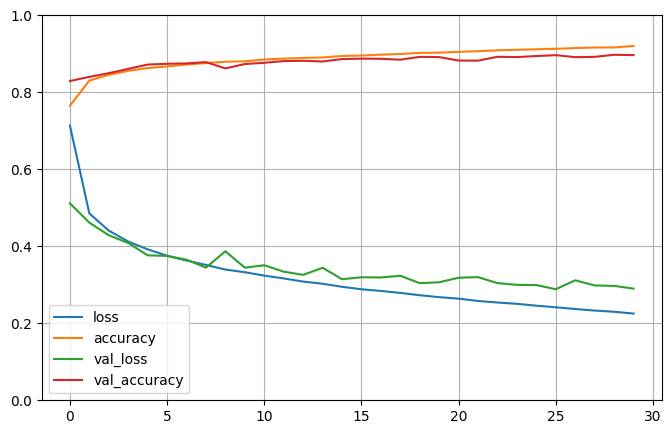

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Se puede observar que la función de pérdida y la precisión en el conjunto de entrenamiento aumentan, mientras que la función de pérdida y la precisión en el conjunto de validación disminuyen, lo que indica que el modelo está aprendiendo.

Si no estamos satisfechos con el rendimiento del modelo, podemos entrenarlo durante más épocas, o utilizar un modelo más complejo, o utilizar más datos de entrenamiento. Y como Keras continúa el entrenamiento desde donde lo dejamos, podemos llamar al método fit() varias veces, para continuar el entrenamiento.

El conjunto de validación es un conjunto de datos que no se utiliza durante el entrenamiento, por lo que podemos utilizarlo para evaluar el modelo. Para ello, llamamos al método evaluate(), que recibe los datos de entrada y las clases objetivo, y devuelve la función de pérdida y las métricas en el conjunto de validación:

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 757us/step - loss: 76.2380 - accuracy: 0.8248


[76.23802947998047, 0.8248000144958496]

## Utilizando el modelo para hacer predicciones

Una vez que el modelo está entrenado, podemos utilizarlo para hacer predicciones. Para ello, llamamos al método predict(), que recibe los datos de entrada, y devuelve las predicciones del modelo:

In [21]:
# Como no tenemos nuevas instancias, vamos a usar las de test para predecir

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 54ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Con cada instancia, el modelo devuelve un vector de 10 elementos, donde cada elemento es la probabilidad de que la instancia pertenezca a la clase correspondiente. Para obtener la clase predicha, podemos utilizar la función argmax() de numpy, que devuelve el índice del elemento máximo de un vector:

In [22]:
# predecir clase usando argmax de numpy
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 12ms/step


array([9, 2, 1], dtype=int64)

In [23]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Realizando un MLP de regresión utilizando la API secuencial

Vamos a cambiar al problema de regresión, para ello, vamos a utilizar el conjunto de datos de California Housing, que contiene información sobre las casas de California.

Usaremos la función fetch_california_housing() de Scikit-Learn para descargar el conjunto de datos. Esta función devuelve un diccionario con los datos, y también devuelve una descripción del conjunto de datos. Este conjunto de datos es más simple que el anterior, ya que no contiene valores perdidos, y todas las características son numéricas. Además, no hay ninguna característica categórica, por lo que no tenemos que realizar ninguna transformación de características.

Tras cargar los datos, vamos a dividirlos en un conjunto de entrenamiento y un conjunto de test y vamos a normalizarlos. Para ello, vamos a utilizar la clase StandardScaler de Scikit-Learn, que calcula la media y la desviación estándar de los datos, y luego los normaliza.

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
 housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Usar la API secuencial de Keras para construir un modelo de regresión es muy similar a la construcción de un modelo de clasificación. La única diferencia es que en lugar de utilizar la función softmax() en la última capa, vamos a utilizar la función de activación lineal, que no realiza ninguna transformación. Además, en lugar de utilizar la función de pérdida crossentropy, vamos a utilizar la función de pérdida MSE (Mean Squared Error), que es la función de pérdida más común para problemas de regresión.

In [25]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 751us/step - loss: 0.8309 - val_loss: 0.6793
Epoch 2/20
363/363 [==============================] - 0s 649us/step - loss: 1.0034 - val_loss: 0.4832
Epoch 3/20
363/363 [==============================] - 0s 591us/step - loss: 0.4947 - val_loss: 0.4509
Epoch 4/20
363/363 [==============================] - 0s 629us/step - loss: 0.4559 - val_loss: 0.4150
Epoch 5/20
363/363 [==============================] - 0s 586us/step - loss: 0.4362 - val_loss: 0.4013
Epoch 6/20
363/363 [==============================] - 0s 594us/step - loss: 0.4234 - val_loss: 0.3881
Epoch 7/20
363/363 [==============================] - 0s 602us/step - loss: 0.4134 - val_loss: 0.3835
Epoch 8/20
363/363 [==============================] - 0s 627us/step - loss: 0.4074 - val_loss: 0.3768
Epoch 9/20
363/363 [==============================] - 0s 621us/step - loss: 0.4077 - val_loss: 0.4056
Epoch 10/20
363/363 [==============================] - 0s 660us/step - loss: 0.406

In [26]:
y_pred

array([[2.7467659],
       [1.133008 ],
       [1.6349635]], dtype=float32)

## Construyendo modelos complejos utilizando la API funcional

Los modelos secuenciales son bastante comunes, pero no son los únicos. En ocasiones, necesitamos construir modelos más complejos, como modelos con múltiples entradas o múltiples salidas, o modelos con capas compartidas. Para ello, podemos utilizar la API funcional de Keras.

Un ejemplo de un modelo funcional sería el modelo Wide & Deep, que se utiliza para problemas de regresión y clasificación. Este modelo combina dos tipos de entradas: una entrada de características profundas, que se conecta a una red neuronal profunda, y una entrada de características anchas, que se conecta directamente a la salida.

Esta arquitectura permite que el modelo aprenda características profundas y características simples, y luego las combine para hacer predicciones. Por ejemplo, el modelo podría aprender características profundas de las imágenes, y luego combinarlas con características simples, como el precio de la casa, para hacer predicciones.

Vamos a construir un modelo Wide & Deep para el problema de regresión de California Housing. Para ello, vamos a utilizar la API funcional de Keras. En primer lugar, vamos a crear una entrada para las características profundas, y vamos a conectarla a una red neuronal profunda:

In [27]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Vamos a explicar cada línea de código:

* Creamos una entrada para las características profundas, utilizando la clase Input() de Keras. Esta clase recibe el tamaño de la entrada, y devuelve un objeto que representa la entrada.

* Creamos una capa oculta densa con 30 neuronas, utilizando la función de activación ReLU, y conectamos la entrada a esta capa oculta.

* Creamos una segunda capa oculta densa con 30 neuronas, utilizando la función de activación ReLU, y conectamos la salida de la primera capa oculta a esta capa oculta.

* Creamos una capa concatenada, utilizando la clase Concatenate() de Keras. Esta clase recibe una lista de capas, y devuelve una capa que concatena las salidas de las capas de entrada.

* Creamos una capa de salida densa con una sola neurona, y conectamos la salida de la capa concatenada a esta capa de salida.

* Creamos un modelo, utilizando la clase Model() de Keras. Esta clase recibe la entrada y la salida, y devuelve un modelo que recibe las características profundas como entrada, y devuelve las salidas de la capa de salida.


Una vez construido el modelo, podemos compilarlo y entrenarlo de la misma forma que hemos hecho con los modelos secuenciales.

Pero y si queremos que un subgrupo de capas se conecte a otra entrada? Por ejemplo, si queremos que la capa de salida se conecte a la entrada de características anchas, en lugar de a la salida de la capa oculta? Para ello, podemos utilizar la clase Input() de Keras para crear una segunda entrada, y luego conectar la capa de salida a esta segunda entrada. Supongamos que queremos enviar 5 características por el camino ancho, y 6 características por el camino profundo. Podemos hacerlo de la siguiente forma:

In [28]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Ahora podemos compilar el modelo como normalmente, pero al usar el método fit() de Keras, debemos pasar las características anchas y profundas como dos matrices separadas. X_train_A y X_train_B, lo mismo sucede para X_valid y para X_test; así como para X_new al llamar a evaluate() y predict().

In [29]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
  1/363 [..............................] - ETA: 52s - loss: 4.5481

C:\Users\AdriánPortilloSánche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 0s 856us/step - loss: 2.2922 - val_loss: 1.0299
Epoch 2/20
363/363 [==============================] - 0s 705us/step - loss: 0.8720 - val_loss: 0.7264
Epoch 3/20
363/363 [==============================] - 0s 685us/step - loss: 0.7086 - val_loss: 0.6394
Epoch 4/20
363/363 [==============================] - 0s 696us/step - loss: 0.6482 - val_loss: 0.5960
Epoch 5/20
363/363 [==============================] - 0s 704us/step - loss: 0.6167 - val_loss: 0.5739
Epoch 6/20
363/363 [==============================] - 0s 790us/step - loss: 0.5983 - val_loss: 0.5576
Epoch 7/20
363/363 [==============================] - 0s 710us/step - loss: 0.5834 - val_loss: 0.5407
Epoch 8/20
363/363 [==============================] - 0s 720us/step - loss: 0.5718 - val_loss: 0.5276
Epoch 9/20
363/363 [==============================] - 0s 749us/step - loss: 0.5571 - val_loss: 0.5149
Epoch 10/20
363/363 [==============================] - 0s 732us/step - loss: 0.5492 - val_los

Hay muchos casos en los que podríamos querer construir modelos complejos, como modelos con múltiples entradas y múltiples salidas, o modelos con capas compartidas. La API funcional de Keras es muy útil para construir modelos complejos, y es muy fácil de usar.

Añadir más salidas es tan fácil como añadir más capas de salida. Por ejemplo, supongamos que queremos añadir una capa de salida para clasificar las imágenes en 5 clases. Podemos hacerlo de la siguiente forma:

In [30]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Cada capa de salida requiere su propia función de pérdida, así que debemos pasar una lista de funciones de pérdida al compilar el modelo. Por ejemplo, si queremos que la capa de salida de regresión utilice la función de pérdida MSE, y la capa de salida de clasificación utilice la función de pérdida Stochastic Gradient Descent, podemos hacerlo de la siguiente forma:

In [31]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Ahora cuando entrenamos el modelo, debemos pasar etiquetas para ambas salidas. En este ejemplo usaremos las mismas etiquetas para ambas salidas, pero en la práctica, es muy probable que tengamos etiquetas diferentes para cada salida. Por ejemplo, podríamos tener una etiqueta de precio para la salida de regresión, y una etiqueta de clase para la salida de clasificación. Por ello pasamos y_train e y_valid como una lista de dos matrices, [y_train, y_train], [y_valid, y_valid].

In [32]:
history = model.fit(
 [X_train_A, X_train_B], [y_train, y_train], epochs=20,
 validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 977us/step - loss: 0.8424 - main_output_loss: 0.6977 - aux_output_loss: 2.1450 - val_loss: 0.8931 - val_main_output_loss: 0.8680 - val_aux_output_loss: 1.1191
Epoch 2/20
363/363 [==============================] - 0s 727us/step - loss: 1.1455 - main_output_loss: 1.1447 - aux_output_loss: 1.1533 - val_loss: 0.6233 - val_main_output_loss: 0.5619 - val_aux_output_loss: 1.1753
Epoch 3/20
363/363 [==============================] - 0s 727us/step - loss: 0.6128 - main_output_loss: 0.5584 - aux_output_loss: 1.1026 - val_loss: 0.6019 - val_main_output_loss: 0.5605 - val_aux_output_loss: 0.9740
Epoch 4/20
363/363 [==============================] - 0s 747us/step - loss: 0.6832 - main_output_loss: 0.6572 - aux_output_loss: 0.9178 - val_loss: 0.9647 - val_main_output_loss: 0.9799 - val_aux_output_loss: 0.8280
Epoch 5/20
363/363 [==============================] - 0s 751us/step - loss: 1.7713 - main_output_loss: 1.8633 - aux_output_loss: 0.9435 

Cuando evaluamos el modelo, Keras devuelve el valor de la función de pérdida para cada salida, y el valor total de la función de pérdida. Por ejemplo, si queremos evaluar el modelo en el conjunto de prueba, podemos hacerlo de la siguiente forma:

In [33]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 497us/step - loss: 0.4312 - main_output_loss: 0.4227 - aux_output_loss: 0.5082


De igual manera, el método predict() de Keras devuelve una matriz por cada salida. Por ejemplo, si queremos hacer predicciones para el conjunto de prueba, podemos hacerlo de la siguiente forma:

In [34]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 33ms/step


Podemos construir cualquier arquitectura de red neuronal que queramos, utilizando la API funcional de Keras. Vamos a ver una última forma de construir modelos complejos, utilizando la API de subclases de Keras.

## Utilizando la API de subclases para construir modelos dinámicos

Las APIs secuencial y funcional de Keras son muy útiles para construir modelos estáticos, pero no son tan útiles para construir modelos dinámicos. Por ejemplo, si queremos construir un modelo que cambia su arquitectura en función de los datos de entrada, no podemos hacerlo con la API secuencial o funcional de Keras. Para construir modelos dinámicos, podemos utilizar la API de subclases de Keras.

Simplemente tenemos que crear una clase que herede de la clase Model de Keras, y definir los métodos __init__() y call(). El método __init__() se utiliza para crear las capas del modelo, y el método call() se utiliza para definir la arquitectura del modelo. Por ejemplo, supongamos que queremos construir un modelo que recibe una matriz de características, y devuelve una matriz de predicciones. Podemos hacerlo de la siguiente forma, con el ejemplo anterior de modelo Wide & Deep:

In [35]:
class WideAndDeepModel(keras.Model):
    
 def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

 def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

Este ejemplo se parece mucho al ejemplo de la API funcional, pero hay una diferencia importante: en lugar de crear una instancia de la clase Model, simplemente creamos una instancia de la clase WideAndDeepModel. Esto es posible porque la clase WideAndDeepModel hereda de la clase Model de Keras. Cuando llamamos al método fit() de Keras, Keras crea una instancia de la clase WideAndDeepModel, y luego llama al método call() de la instancia para construir el grafo de cálculo. El método call() se llama automáticamente cuando llamamos al método fit(), evaluate() o predict() de Keras.

Esto viene con un coste, la arquitectura del modelo está oculta al método call(), por lo que Keras no puede inspeccionarla, ni guardarla, ni mostrarla. Si queremos ver la arquitectura del modelo, podemos llamar al método summary() de Keras, o podemos imprimir el modelo como una cadena de texto, como se muestra a continuación:

In [36]:
# veamos un resumen del modelo

model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate(
    (X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

model.summary()

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.2409 - output_1_loss: 1.1207 - output_2_loss: 2.3221 - val_loss: 0.6052 - val_output_1_loss: 0.5218 - val_output_2_loss: 1.3556
Epoch 2/10
363/363 [==============================] - 0s 727us/step - loss: 0.6236 - output_1_loss: 0.5552 - output_2_loss: 1.2392 - val_loss: 0.5259 - val_output_1_loss: 0.4557 - val_output_2_loss: 1.1577
Epoch 3/10
363/363 [==============================] - 0s 764us/step - loss: 0.5422 - output_1_loss: 0.4821 - output_2_loss: 1.0825 - val_loss: 0.4889 - val_output_1_loss: 0.4301 - val_output_2_loss: 1.0185
Epoch 4/10
363/363 [==============================] - 0s 736us/step - loss: 0.5382 - output_1_loss: 0.4892 - output_2_loss: 0.9796 - val_loss: 0.4808 - val_output_1_loss: 0.4307 - val_output_2_loss: 0.9317
Epoch 5/10
363/363 [==============================] - 0s 730us/step - loss: 0.4940 - output_1_loss: 0.4526 - output_2_loss: 0.8671 - val_loss: 0.4573 - val_output_1_loss: 0.4177 

## Guardando y restaurando un modelo

Una vez que hemos entrenado un modelo, es muy útil poder guardar sus parámetros y luego restaurarlos cuando queramos. Esto nos permite continuar entrenando el modelo, hacer predicciones, o simplemente usar el modelo sin tener que volver a entrenarlo. Para guardar un modelo, podemos usar el método save() de Keras. Por ejemplo, para guardar el modelo anterior, podemos hacerlo de la siguiente forma:

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[8]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))

model.save("my_keras_model.h5")

Epoch 1/30
363/363 [==============================] - 1s 993us/step - loss: 1.7114 - accuracy: 0.0026 - val_loss: 1.3850 - val_accuracy: 0.0047
Epoch 2/30
363/363 [==============================] - 0s 819us/step - loss: 1.2764 - accuracy: 0.0027 - val_loss: 1.1991 - val_accuracy: 0.0039
Epoch 3/30
363/363 [==============================] - 0s 810us/step - loss: 1.1578 - accuracy: 0.0023 - val_loss: 1.1231 - val_accuracy: 0.0036
Epoch 4/30
363/363 [==============================] - 0s 795us/step - loss: 1.1012 - accuracy: 0.0022 - val_loss: 1.0806 - val_accuracy: 0.0036
Epoch 5/30
363/363 [==============================] - 0s 793us/step - loss: 1.0659 - accuracy: 0.0022 - val_loss: 1.0530 - val_accuracy: 0.0036
Epoch 6/30
363/363 [==============================] - 0s 805us/step - loss: 1.0415 - accuracy: 0.0022 - val_loss: 1.0333 - val_accuracy: 0.0034
Epoch 7/30
363/363 [==============================] - 0s 789us/step - loss: 1.0232 - accuracy: 0.0025 - val_loss: 1.0220 - val_accuracy:

Keras utiliza el formato Protocol Buffers para guardar los modelos. Este formato es muy eficiente, y es el formato utilizado por TensorFlow para guardar los modelos. Por defecto, Keras guarda los modelos en el formato HDF5, que es un formato muy popular para guardar datos estructurados. Este formato es compatible con muchos lenguajes de programación, y es fácil de usar desde Python. Si queremos guardar el modelo en otro formato, podemos hacerlo especificando el parámetro save_format. 

Para recuperar un modelo guardado, podemos usar el método load_model() de Keras. Por ejemplo, para recuperar el modelo anterior, podemos hacerlo de la siguiente forma:

In [38]:
model = keras.models.load_model("my_keras_model.h5")

## Callbacks para guardar y restaurar modelos

¿Pero qué pasa si el entrenamiento dura mucho tiempo, y queremos guardar el modelo cada cierto tiempo, para poder restaurarlo en caso de fallo?

En este caso deberíamos guardar el modelo cada cierto tiempo, y luego restaurarlo si falla. Para hacer esto, podemos usar callbacks. Un callback es un objeto que se pasa al método fit() de Keras, y que Keras llama en ciertos momentos durante el entrenamiento (por ejemplo, al comienzo y al final de cada época). Por ejemplo, podemos crear un callback que guarde el modelo a intervalos regulares, y luego restaurarlo si falla. Para hacer esto, podemos crear una clase que herede de la clase Callback de Keras, y definir los métodos on_epoch_end() y on_train_begin(). El método on_epoch_end() se llama al final de cada época, y el método on_train_begin() se llama al comienzo del entrenamiento. Por ejemplo, para guardar el modelo cada a intervalos regulares, podemos hacerlo de la siguiente forma:

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 652us/step - loss: 0.8858 - accuracy: 0.0023
Epoch 2/10
363/363 [==============================] - 0s 653us/step - loss: 0.8819 - accuracy: 0.0025
Epoch 3/10
363/363 [==============================] - 0s 629us/step - loss: 0.8796 - accuracy: 0.0028
Epoch 4/10
363/363 [==============================] - 0s 628us/step - loss: 0.8758 - accuracy: 0.0025
Epoch 5/10
363/363 [==============================] - 0s 626us/step - loss: 0.8728 - accuracy: 0.0028
Epoch 6/10
363/363 [==============================] - 0s 627us/step - loss: 0.8711 - accuracy: 0.0026
Epoch 7/10
363/363 [==============================] - 0s 631us/step - loss: 0.8675 - accuracy: 0.0028
Epoch 8/10
363/363 [==============================] - 0s 628us/step - loss: 0.8650 - accuracy: 0.0025
Epoch 9/10
363/363 [==============================] - 0s 638us/step - loss: 0.8627 - accuracy: 0.0026
Epoch 10/10
363/363 [==============================] - 0s 639us/step - loss: 0.859

Es más, si usamos un conjunto de validación, podemos guardar el modelo que obtenga el mejor rendimiento en el conjunto de validación. Podemos asignar el parámetro save_best_only = True durante la creación del objeto ModelCheckpoint, y Keras solo guardará el modelo si mejora el rendimiento en el conjunto de validación.

De esta manera no tienes que preocuparte por entrenar durante mucho tiempo y sobreajustar el modelo, ya que Keras solo guardará el modelo que obtenga el mejor rendimiento en el conjunto de validación. Este código es una manera sencilla de implementar el algoritmo de early stopping.

In [40]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
 save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
 validation_data=(X_valid, y_valid),
 callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") 

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8579 - accuracy: 0.0027 - val_loss: 0.9132 - val_accuracy: 0.0039
Epoch 2/10
363/363 [==============================] - 0s 859us/step - loss: 0.8554 - accuracy: 0.0027 - val_loss: 0.9145 - val_accuracy: 0.0041
Epoch 3/10
363/363 [==============================] - 0s 830us/step - loss: 0.8534 - accuracy: 0.0029 - val_loss: 0.9089 - val_accuracy: 0.0039
Epoch 4/10
363/363 [==============================] - 0s 810us/step - loss: 0.8508 - accuracy: 0.0027 - val_loss: 0.9102 - val_accuracy: 0.0039
Epoch 5/10
363/363 [==============================] - 0s 821us/step - loss: 0.8503 - accuracy: 0.0029 - val_loss: 0.9125 - val_accuracy: 0.0039
Epoch 6/10
363/363 [==============================] - 0s 844us/step - loss: 0.8473 - accuracy: 0.0027 - val_loss: 0.9057 - val_accuracy: 0.0041
Epoch 7/10
363/363 [==============================] - 0s 811us/step - loss: 0.8440 - accuracy: 0.0029 - val_loss: 0.9063 - val_accuracy: 0

Otra manera de implementar early stopping es usar el parámetro patience del objeto EarlyStopping. Este parámetro especifica el número de épocas que Keras debe esperar antes de detener el entrenamiento si no mejora el rendimiento en el conjunto de validación. Por ejemplo, podemos crear un objeto EarlyStopping con el parámetro patience = 10, y Keras detendrá el entrenamiento si no mejora el rendimiento en el conjunto de validación durante 10 épocas.

In [41]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8406 - accuracy: 0.0029 - val_loss: 0.9047 - val_accuracy: 0.0041
Epoch 2/100
363/363 [==============================] - 0s 831us/step - loss: 0.8398 - accuracy: 0.0027 - val_loss: 0.9016 - val_accuracy: 0.0039
Epoch 3/100
363/363 [==============================] - 0s 842us/step - loss: 0.8368 - accuracy: 0.0026 - val_loss: 0.9009 - val_accuracy: 0.0044
Epoch 4/100
363/363 [==============================] - 0s 802us/step - loss: 0.8358 - accuracy: 0.0028 - val_loss: 0.9061 - val_accuracy: 0.0041
Epoch 5/100
363/363 [==============================] - 0s 818us/step - loss: 0.8335 - accuracy: 0.0027 - val_loss: 0.9044 - val_accuracy: 0.0041
Epoch 6/100
363/363 [==============================] - 0s 853us/step - loss: 0.8307 - accuracy: 0.0028 - val_loss: 0.9008 - val_accuracy: 0.0047
Epoch 7/100
363/363 [==============================] - 0s 797us/step - loss: 0.8290 - accuracy: 0.0028 - val_loss: 0.9102 - val_accu

El número de épocas que Keras debe esperar antes de detener el entrenamiento se llama el número de épocas de paciencia. Si el rendimiento en el conjunto de validación no mejora durante el número de épocas de paciencia, Keras detendrá el entrenamiento. Si el rendimiento en el conjunto de validación mejora, Keras reiniciará el número de épocas de paciencia, y esperará otros 10 épocas antes de detener el entrenamiento. Si el rendimiento en el conjunto de validación no mejora durante 10 épocas, Keras detendrá el entrenamiento. Si el rendimiento en el conjunto de validación mejora, Keras reiniciará el número de épocas de paciencia, y esperará otros 10 épocas antes de detener el entrenamiento. Y así sucesivamente.

Si necesitas de un mayor grado de control sobre el entrenamiento, puedes crear tus propios callbacks. Para hacer esto, debes crear una clase que herede de la clase Callback de Keras, y definir los métodos que quieras. Por ejemplo, podemos crear un callback que muestre el ratio entre el error de entrenamiento y el error de validación al final de cada época. Para hacer esto, podemos crear una clase que herede de la clase Callback de Keras, y definir el método on_epoch_end(). El método on_epoch_end() se llama al final de cada época, y recibe como parámetro los logs, que es un diccionario que contiene el error de entrenamiento y el error de validación. Por ejemplo, podemos crear un callback que muestre el ratio entre el error de entrenamiento y el error de validación al final de cada época de la siguiente forma:

In [42]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

Podemos implementar los callbacks en on_train_begin() y on_train_end() para realizar acciones al comienzo y al final del entrenamiento. En on_epoch_begin() y on_epoch_end() podemos realizar acciones al comienzo y al final de cada época. En on_batch_begin() y on_batch_end() podemos realizar acciones al comienzo y al final de cada lote. En on_test_begin() y on_test_end() podemos realizar acciones al comienzo y al final de la evaluación. En on_predict_begin() y on_predict_end() podemos realizar acciones al comienzo y al final de las predicciones. En on_train_batch_begin() y on_train_batch_end() podemos realizar acciones al comienzo y al final de cada lote de entrenamiento. En on_test_batch_begin() y on_test_batch_end() podemos realizar acciones al comienzo y al final de cada lote de evaluación. En on_predict_batch_begin() y on_predict_batch_end() podemos realizar acciones al comienzo y al final de cada lote de predicción.

## Usando TensorBoard para visualizar el entrenamiento

Finalmente vamos a conocer una herramienta muy útil para el uso de tf.keras: TensorBoard. TensorBoard es una herramienta de visualización de TensorFlow que nos permite visualizar los resultados de nuestro modelo. Por ejemplo, podemos visualizar el error de entrenamiento y el error de validación en cada época, y podemos visualizar el rendimiento de nuestro modelo en el conjunto de validación. Para usar TensorBoard, debemos crear un objeto TensorBoard, y pasar el objeto a la función fit() del modelo. Por ejemplo, podemos crear un objeto TensorBoard con el parámetro log_dir = 'logs', y pasar el objeto a la función fit() del modelo de la siguiente forma:

In [43]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [44]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
 validation_data=(X_valid, y_valid),
 callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 891us/step - loss: 0.7728 - accuracy: 0.0030 - val_loss: 0.8733 - val_accuracy: 0.0044
Epoch 2/30
363/363 [==============================] - 0s 838us/step - loss: 0.7714 - accuracy: 0.0031 - val_loss: 0.8764 - val_accuracy: 0.0044
Epoch 3/30
363/363 [==============================] - 0s 833us/step - loss: 0.7731 - accuracy: 0.0032 - val_loss: 0.8689 - val_accuracy: 0.0044
Epoch 4/30
363/363 [==============================] - 0s 820us/step - loss: 0.7702 - accuracy: 0.0029 - val_loss: 0.8758 - val_accuracy: 0.0044
Epoch 5/30
363/363 [==============================] - 0s 815us/step - loss: 0.7702 - accuracy: 0.0030 - val_loss: 0.8799 - val_accuracy: 0.0041
Epoch 6/30
363/363 [==============================] - 0s 813us/step - loss: 0.7710 - accuracy: 0.0028 - val_loss: 0.8773 - val_accuracy: 0.0044
Epoch 7/30
363/363 [==============================] - 0s 815us/step - loss: 0.7697 - accuracy: 0.0028 - val_loss: 0.8719 - val_accuracy:

La librería de TensorBoard ofrece una API de bajo nivel con el paquete tf.summary, el siguiente código utiliza la función create_file_writer() para crear un SummaryWritter, y lo utiliza para escribir un registro escalares, histogramas, imágenes, audio y texto, que pueden ser visualizados usando TensorBoard.

In [45]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
 for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    data = (np.random.randn(100) + 2) * step / 100 # some random data
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
    tf.summary.image("my_images", images * step / 1000, step=step)
    texts = ["The step is " + str(step), "Its square is " + str(step**2)]
    tf.summary.text("my_text", texts, step=step)
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
    audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
    tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [46]:
%load_ext tensorboard

In [48]:
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 22668), started 0:00:15 ago. (Use '!kill 22668' to kill it.)

## Ajuste de hiperparámetros de la red neuronal

La flexibilidad de las redes neuronales es también uno de sus inconvenientes: hay que afinar muchos parámetros para obtener un buen rendimiento. Tenemos que elegir el número de capas, el número de neuronas por capa, la función de activación de cada capa, el número de épocas de entrenamiento, el tamaño del lote, el optimizador, la tasa de aprendizaje, el momento, etc. Hay muchos parámetros que podemos ajustar, y es difícil saber cuáles son los mejores. 

Una opción es usar GridSearchCV o RandomizedSearchCV para explorar el espacio de hiperparámetros. Por ejemplo, podemos crear un objeto GridSearchCV, y pasarle el modelo, el espacio de hiperparámetros, el número de validaciones cruzadas, y el número de procesadores que queremos usar.

Para hacer esto, primero tendremos que envolver nuestros modelos de Keras en un objeto que imite a los regresores de Scikit-Learn. Para hacer esto, podemos crear una clase que herede de la clase BaseEstimator de Scikit-Learn.

In [49]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Esta función crea un modelo Secuencial simple para una regresión univariante, con una capa de entrada, una serie de capas ocultas y una capa de salida, se compila usando un optimizador SGD configurado con el parámetro learning_rate.

Vamos a crear un KerasRegressor basado en la función build_model():

In [57]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\AdriánPortilloSánche\AppData\Local\Temp\ipykernel_10532\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Este objeto se puede usar como cualquier otro regresor de Scikit-Learn. Por ejemplo, podemos entrenarlo usando el método fit(), evaluarlo usando el método score(), y hacer predicciones usando el método predict().

In [58]:
keras_reg.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
  1/363 [..............................] - ETA: 45s - loss: 4.8188

C:\Users\AdriánPortilloSánche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 0s 792us/step - loss: 1.4475 - val_loss: 0.7006
Epoch 2/100
363/363 [==============================] - 0s 634us/step - loss: 0.7053 - val_loss: 0.6231
Epoch 3/100
363/363 [==============================] - 0s 612us/step - loss: 0.6430 - val_loss: 0.5767
Epoch 4/100
363/363 [==============================] - 0s 624us/step - loss: 0.5964 - val_loss: 0.5350
Epoch 5/100
363/363 [==============================] - 0s 623us/step - loss: 0.5766 - val_loss: 0.5367
Epoch 6/100
363/363 [==============================] - 0s 636us/step - loss: 0.5610 - val_loss: 0.5624
Epoch 7/100
363/363 [==============================] - 0s 642us/step - loss: 0.6520 - val_loss: 0.6280
Epoch 8/100
363/363 [==============================] - 0s 629us/step - loss: 0.6696 - val_loss: 0.4833
Epoch 9/100
363/363 [==============================] - 0s 655us/step - loss: 0.5126 - val_loss: 0.4535
Epoch 10/100
363/363 [==============================] - 0s 638us/step - loss: 0.4906 

Cualquier parámetro que se pase al método fit() se pasarán al método fit() del modelo de Keras.

Además, la puntuación será la contraria del error cuadrático medio (MSE), ya que Scikit-Learn maximiza las puntuaciones, mientras que Keras minimiza las pérdidas.

Pero no queremos simplemente entrenar un modelo, queremos entrenar sus cientos de variantes para ver cual obtiene mejor rendimiento en el conjunto de validación. Ya que hay muchos parámetros, será mejor usar random search en lugar de grid search. Para ello, podemos crear un objeto RandomizedSearchCV, vamos a explorar el número de capas ocultas, el número de neuronas por capa y la tasa de aprendizaje:

In [59]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 996us/step - loss: 1.7294 - val_loss: 22.0516
Epoch 2/100
242/242 [==============================] - 0s 735us/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 739us/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 751us/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 751us/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 724us/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 717us/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 710us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 708us/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 701us/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [

C:\Users\AdriánPortilloSánche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [        nan -0.43224024         nan -0.54863852         nan -0.45666197
 -0.32936981 -1.34245129 -0.54342322 -0.55447674]
  warnings.warn(


363/363 [==============================] - 0s 804us/step - loss: 1.0507 - val_loss: 0.5857
Epoch 2/100
363/363 [==============================] - 0s 649us/step - loss: 0.6277 - val_loss: 0.5158
Epoch 3/100
363/363 [==============================] - 0s 663us/step - loss: 0.5471 - val_loss: 0.4373
Epoch 4/100
363/363 [==============================] - 0s 657us/step - loss: 0.4629 - val_loss: 0.4099
Epoch 5/100
363/363 [==============================] - 0s 651us/step - loss: 0.4413 - val_loss: 0.4022
Epoch 6/100
363/363 [==============================] - 0s 659us/step - loss: 0.4265 - val_loss: 0.3906
Epoch 7/100
363/363 [==============================] - 0s 660us/step - loss: 0.4186 - val_loss: 0.3806
Epoch 8/100
363/363 [==============================] - 0s 649us/step - loss: 0.4109 - val_loss: 0.3778
Epoch 9/100
363/363 [==============================] - 0s 655us/step - loss: 0.4016 - val_loss: 0.3718
Epoch 10/100
363/363 [==============================] - 0s 643us/step - loss: 0.3939 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001ABA6EE07C0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001ABA6ECAAA0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

La exploración puede ocupar varias horas, una vez que se haya completado, podemos ver los mejores parámetros encontrados:

In [60]:
rnd_search_cv.best_params_

{'learning_rate': 0.004683082198532954, 'n_hidden': 2, 'n_neurons': 62}

In [61]:
rnd_search_cv.best_score_

-0.32936981320381165

In [62]:
model = rnd_search_cv.best_estimator_.model

Ahora podemos guardar el modelo, evaluarlo en el conjunto de pruebas, y si estamos satisfechos con el rendimiento, desplegarlo en producción.

Ya que el proceso de encontrar parámetros es costoso se ofrecen diferentes técnicas para encontrar soluciones en menos tiempo, algunas librerías de Python para optimizar hiperparámetros son:

* Hyperopt: Para optimizar hiperparámetros de todo tipo de espacios de búsqueda
* Hyperas, kopt y talos: Para optimizar hiperparámetros de modelos de Keras
* Keras Tuner: Realizada por Google, para modelos de Keras
* SciKit-Optimize (Skopt): Librería de optimización de propósito general, la clase BayesSearchCV es una implementación de búsqueda bayesiana
* Spearmint: Librería de optimización bayesiana.
* Hyperband: Una librería de gran velocidad basada en el algoritmo Hyperband.
* Sklearn-Deap: Una librería basada en algoritmos genéticos.

Además, muchas compañías ofrecen servicios de optimización de hiperparámetros, como por ejemplo:

* Amazon SageMaker.
* Google Cloud AI Platform.
* Microsoft Azure Machine Learning.
* Paperspace Gradient.
* Databricks.
* H2O Driverless AI.
* Domino Data Lab.
* DataRobot.
* SigOpt.
* Tune.
* Optuna.
* Weights & Biases.

### Número de capas ocultas

El número de capas ocultas es un hiperparámetro importante. Si el modelo tiene demasiadas capas, puede tener problemas de sobreajuste, mientras que si tiene demasiadas capas, puede tener problemas de subajuste.

Para encontrar el número óptimo de capas ocultas, podemos entrenar el modelo con diferentes números de capas ocultas, y ver cuál obtiene el mejor rendimiento en el conjunto de validación. Por ejemplo, podemos entrenar el modelo con 1, 2, 3, 4, 5, 6, 7, 8, 9 y 10 capas ocultas, y ver cuál obtiene el mejor rendimiento en el conjunto de validación.

### Número de neuronas por capa

El número de neuronas por capa es otro hiperparámetro importante. Si el modelo tiene demasiadas neuronas por capa, puede tener problemas de sobreajuste, mientras que si tiene demasiadas neuronas por capa, puede tener problemas de subajuste.

Para encontrar el número óptimo de neuronas por capa, podemos entrenar el modelo con diferentes números de neuronas por capa, y ver cuál obtiene el mejor rendimiento en el conjunto de validación. Por ejemplo, podemos entrenar el modelo con 10, 20, 30, 40, 50, 60, 70, 80, 90 y 100 neuronas por capa, y ver cuál obtiene el mejor rendimiento en el conjunto de validación.

### Tasa de aprendizaje

La tasa de aprendizaje es el hiperparámetro mñas importante. Si la tasa de aprendizaje es demasiado alta, el modelo puede diverger, mientras que si es demasiado baja, el modelo puede converger demasiado lentamente.

Una buena manera es empezar con una tasa de aprendizaje muy baja, y luego ir aumentándola gradualmente hasta que el modelo empiece a diverger. Por ejemplo, podemos empezar con 0.0001, luego 0.001, luego 0.01, luego 0.1, luego 1.0, luego 10.0, luego 100.0, y luego 1000.0. Si el modelo diverge con 0.0001, entonces 0.001 es demasiado baja, y si el modelo diverge con 1.0, entonces 10.0 es demasiado alta.

Esto se consigue multiplicando la tasa por un factor constante en cada iteración, si mostramos la pérdida en función de la tasa de aprendizaje, podemos ver que la pérdida empieza cayendo, pero cuando la tasa de aprendizaje es demasiado alta, la pérdida empieza a subir, el punto en el que la pérdida empieza a subir es la tasa de aprendizaje óptima.	

### Optimizador

El optimizador es también muy importante, veremos optimizadores más avanzados posteriormente.

### Tamaño del lote

El tamaño del lote tendrá un gran impacto en el rendimiento del modelo y el tiempo de entrenamiento. 

Si usamos grandes lotes aceleradores de hardware como GPU o TPU pueden procesarlos más rápido. Se recomienda usar el tamaño de lote que quepa en la memoria RAM de la GPU o TPU.

Sin embargo, los tamaños grandes de lote pueden dar lugar a inestabilidad en el entrenamiento, por lo que podemos usar un tamaño de lote grande, usando una tasa de aprendizaje baja, y si da lugar a resultados inestables, entonces podemos usar un tamaño de lote más pequeño.

### Función de activación

La función de activación es un hiperparámetro importante, y depende de la tarea. Por ejemplo, para la tarea de clasificación de imágenes, la función de activación de la última capa suele ser la función de activación softmax, mientras que para la tarea de regresión, la función de activación de la última capa suele ser la función de activación lineal.

Para las capas ocultas una buena función de activación por defecto sería ReLU.